In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import warnings
warnings.filterwarnings('ignore')

url = r"C:\Users\R\Downloads\archive(18)\heart_disease_uci.csv"
df = pd.read_csv(url)

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [43]:
df.drop('id',axis=1,inplace=True)

In [44]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [46]:
df.isnull().sum()


age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [47]:
print(df['num'].value_counts())

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [48]:
numerical_col = [ 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_col:
      df[col].fillna(df[col].median(), inplace=True)
        
categorical_col = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_col:
      df[col].fillna(df[col].mode()[0], inplace=True)

In [83]:
df.isna().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [49]:
df_encoded = pd.get_dummies(df, columns=categorical_col,drop_first=True)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[numerical_col] = scaler.fit_transform(df_encoded[numerical_col])

print(df_encoded.head())

        age  trestbps      chol    thalch   oldpeak        ca  num  sex_Male  \
0  0.714286     0.725  0.386401  0.633803  0.556818  0.000000    0      True   
1  0.795918     0.800  0.474295  0.338028  0.465909  1.000000    2      True   
2  0.795918     0.600  0.379768  0.485915  0.590909  0.666667    1      True   
3  0.183673     0.650  0.414594  0.894366  0.693182  0.000000    0      True   
4  0.265306     0.650  0.338308  0.788732  0.454545  0.000000    0     False   

   dataset_Hungary  dataset_Switzerland  ...  cp_non-anginal  \
0            False                False  ...           False   
1            False                False  ...           False   
2            False                False  ...           False   
3            False                False  ...            True   
4            False                False  ...           False   

   cp_typical angina  fbs_True  restecg_normal  restecg_st-t abnormality  \
0               True      True           False            

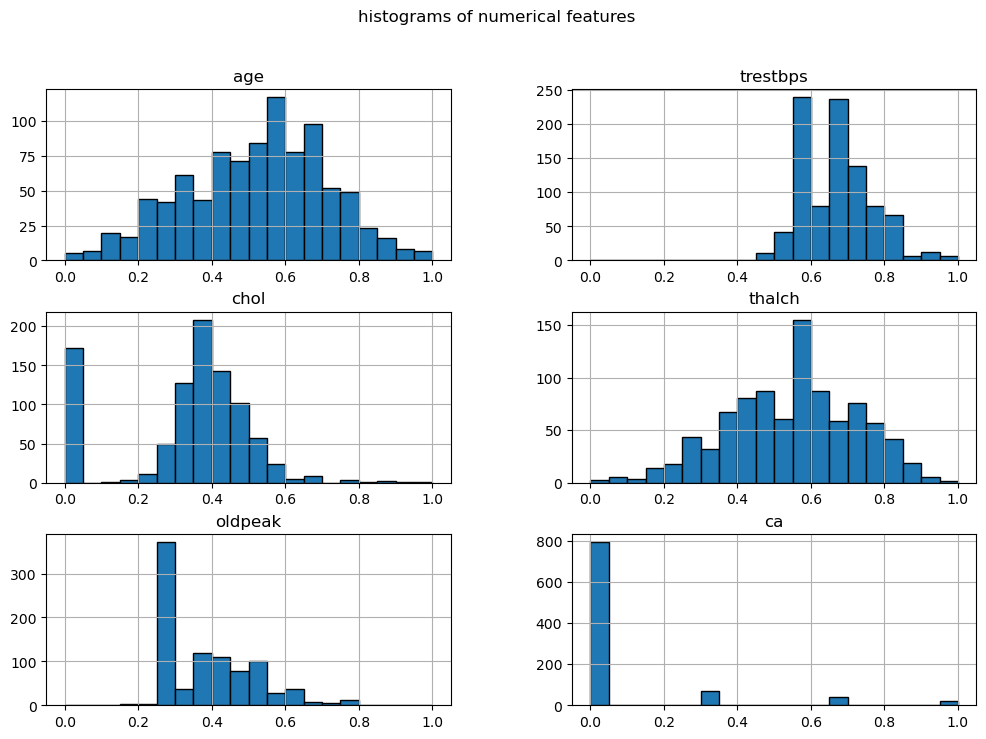

In [51]:
df_encoded[numerical_col].hist(figsize=(12,8), bins=20, edgecolor='black')
plt.suptitle('histograms of numerical features')
plt.show()

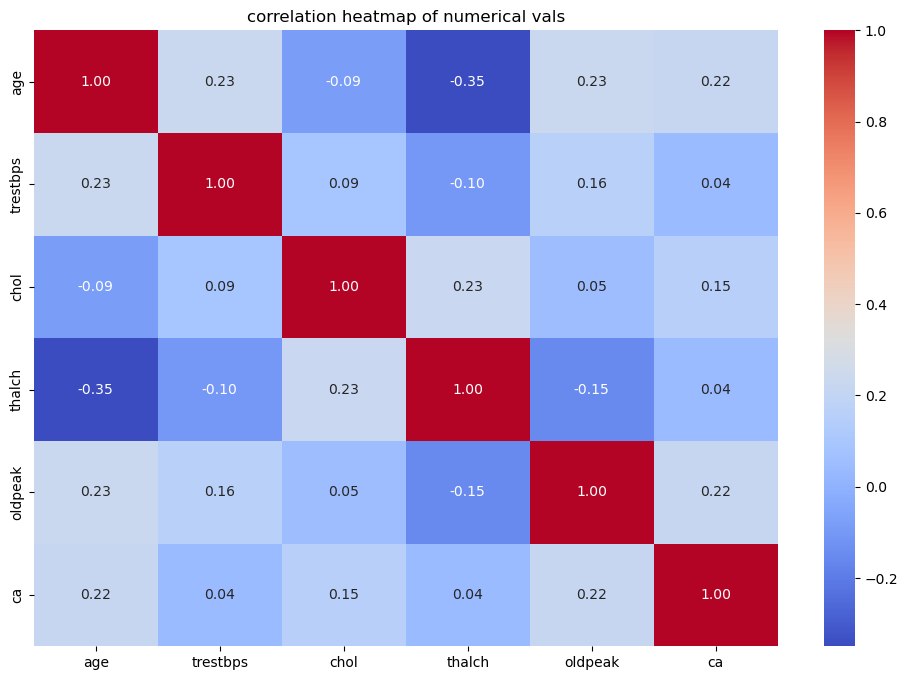

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded[numerical_col].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation heatmap of numerical vals')
plt.show()

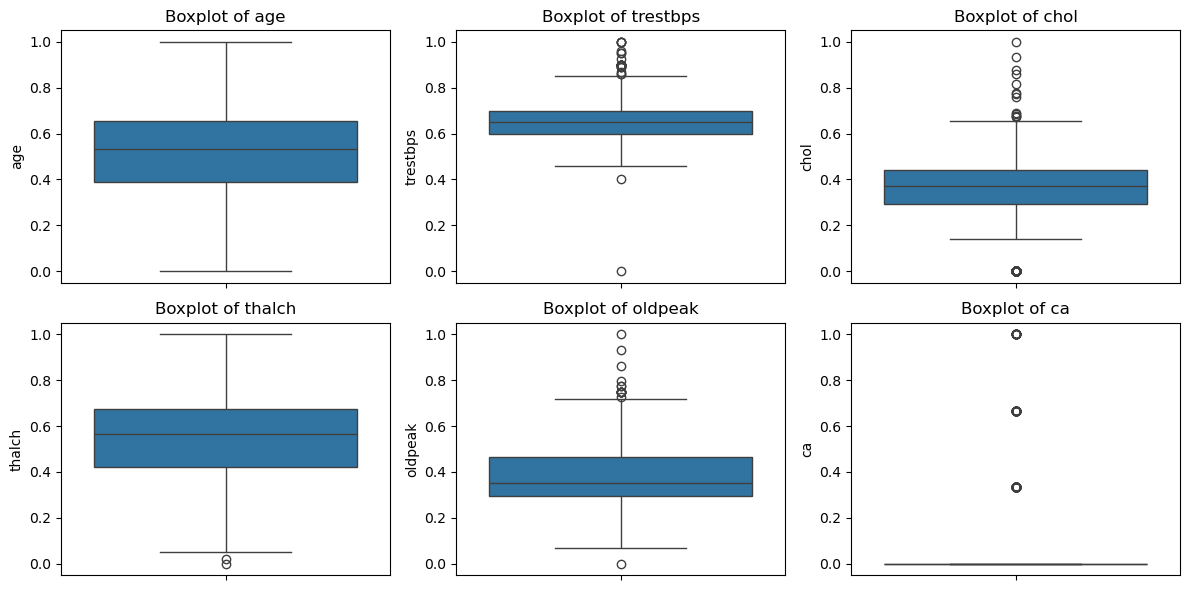

In [53]:
plt.figure(figsize=(12,6))
for i, col in enumerate(numerical_col,1):
  plt.subplot(2,3,i)
  sns.boxplot(y=df_encoded[col])
  plt.title(f'Boxplot of {col}')
  
plt.tight_layout()
plt.show()

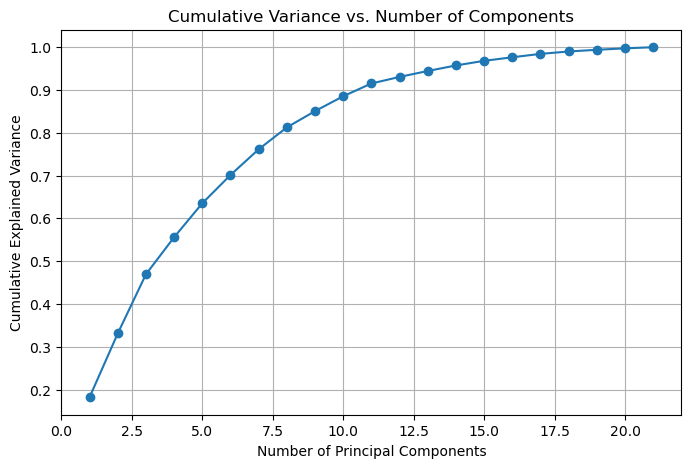

In [54]:
from sklearn.decomposition import PCA

pca = PCA()
X = df_encoded.drop(columns=['num'])
X_pca = pca.fit_transform(X)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance vs. Number of Components")
plt.grid(True)
plt.show()

In [55]:
n_components = np.argmax(pca.explained_variance_ratio_.cumsum()>= 0.95) + 1
print(f"Optimal number of components: {n_components}")

Optimal number of components: 14


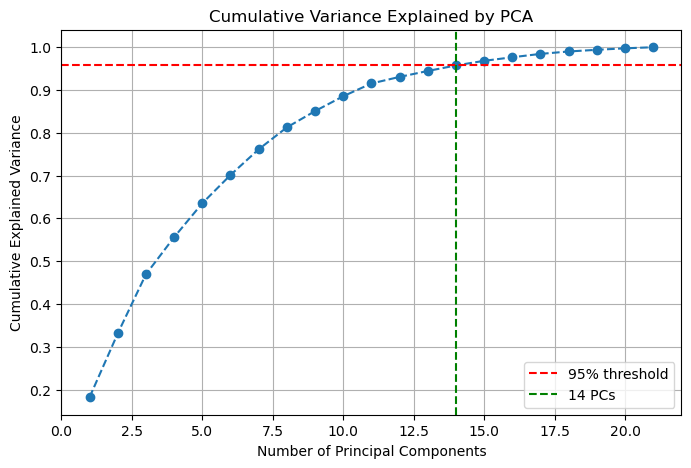

In [56]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='--')
plt.axhline(y=0.958, color='r', linestyle='--', label='95% threshold')
plt.axvline(x=14, color='g', linestyle='--', label='14 PCs')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained by PCA")
plt.legend()
plt.grid()
plt.show()

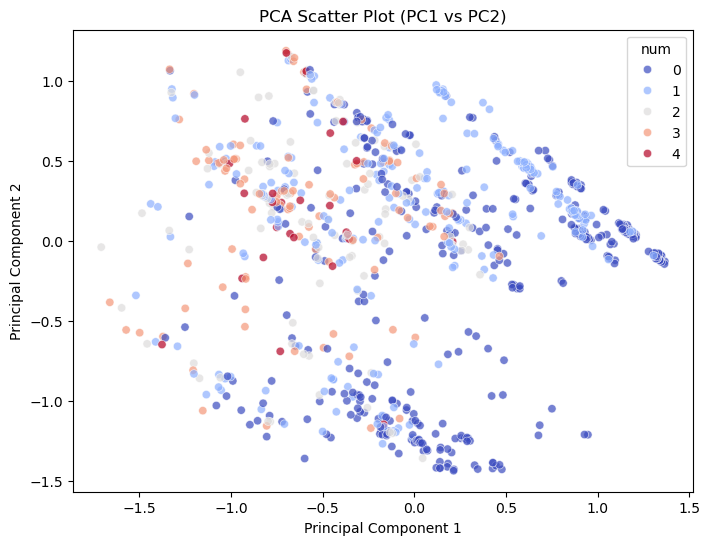

In [57]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['num'], palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.show()

In [58]:
%pip install xgboost

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from xgboost import XGBClassifier

df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
X = df.drop("num", axis=1)  # adjust if your target column has a different name
y = df["num"]
X = pd.get_dummies(X, drop_first=True)

rf = RandomForestClassifier(random_state=42)
rf.fit(X,y)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Random Forest Feature Importance:\n", rf_importances)


Random Forest Feature Importance:
 thalch                      0.128905
chol                        0.127373
oldpeak                     0.106345
age                         0.106089
exang                       0.083982
cp_atypical angina          0.070014
trestbps                    0.069468
sex_Male                    0.041718
cp_non-anginal              0.033987
dataset_Switzerland         0.032270
thal_normal                 0.030973
ca                          0.025053
dataset_VA Long Beach       0.019245
dataset_Hungary             0.018875
restecg_normal              0.017762
fbs                         0.017304
slope_upsloping             0.016501
thal_reversable defect      0.014707
cp_typical angina           0.014220
slope_flat                  0.013244
restecg_st-t abnormality    0.011965
dtype: float64


In [60]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb.fit(X, y)
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\nXGBoost Feature Importance:\n", xgb_importances)



XGBoost Feature Importance:
 exang                       0.284014
cp_atypical angina          0.117683
cp_non-anginal              0.077653
dataset_VA Long Beach       0.059543
sex_Male                    0.054123
thal_normal                 0.049907
ca                          0.039246
dataset_Switzerland         0.033936
slope_upsloping             0.033681
fbs                         0.030844
cp_typical angina           0.026796
chol                        0.026741
slope_flat                  0.025587
oldpeak                     0.024289
age                         0.022534
thalch                      0.018989
restecg_st-t abnormality    0.017393
restecg_normal              0.016908
trestbps                    0.013606
dataset_Hungary             0.013470
thal_reversable defect      0.013054
dtype: float32


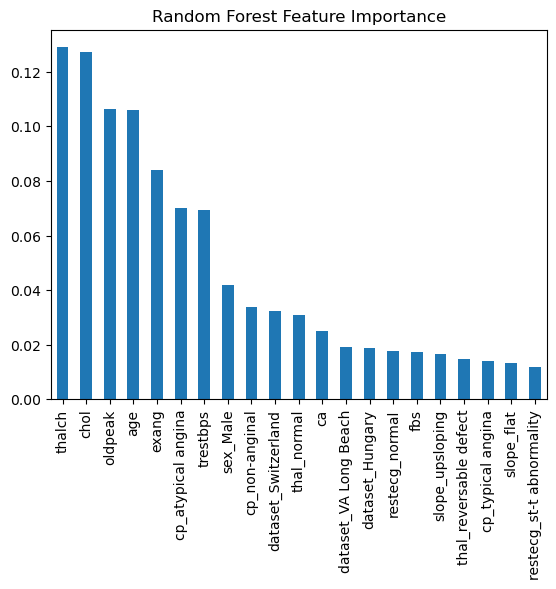

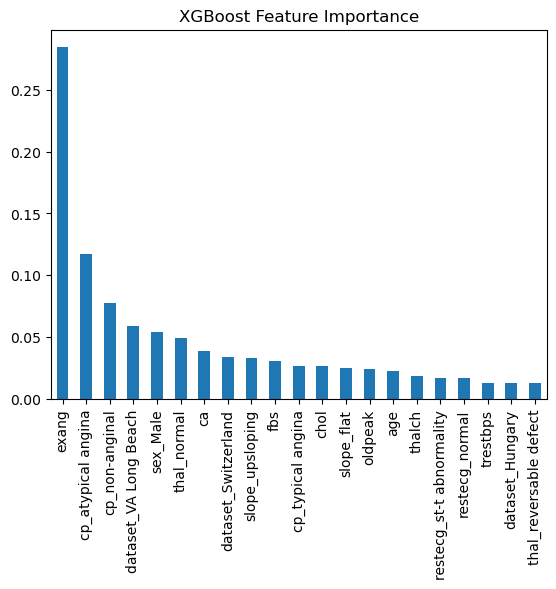

In [61]:
rf_importances.plot(kind="bar", title="Random Forest Feature Importance")
plt.show()
xgb_importances.plot(kind="bar", title="XGBoost Feature Importance")
plt.show()

In [62]:
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=8)
rfe_selector = rfe_selector.fit(X, y)
rfe_features = X.columns[rfe_selector.support_]

print("\nSelected Features by RFE:", list(rfe_features))



Selected Features by RFE: ['age', 'trestbps', 'chol', 'thalch', 'exang', 'oldpeak', 'sex_Male', 'cp_atypical angina']


In [63]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # chi2 requires non-negative values
chi2_selector = SelectKBest(chi2, k=8)
chi2_selector.fit(X_scaled, y)
chi2_features = X.columns[chi2_selector.get_support()]

print("\nSelected Features by Chi-Square Test:", list(chi2_features))


Selected Features by Chi-Square Test: ['exang', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'slope_upsloping', 'thal_reversable defect']


In [64]:
final_features = set(rf_importances.head(8).index) | set(xgb_importances.head(8).index) | set(rfe_features) | set(chi2_features)
print("\nFinal Selected Features for Modeling:", list(final_features))


Final Selected Features for Modeling: ['sex_Male', 'oldpeak', 'dataset_VA Long Beach', 'chol', 'dataset_Switzerland', 'dataset_Hungary', 'thalch', 'thal_reversable defect', 'exang', 'cp_non-anginal', 'age', 'slope_upsloping', 'thal_normal', 'ca', 'cp_atypical angina', 'trestbps']


In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)  # probability=True needed for ROC
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]  # for ROC & AUC
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)
    
    results[name] = [acc, prec, rec, f1, auc_score]
    
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.68      0.75        82
           1       0.78      0.88      0.83       102

    accuracy                           0.79       184
   macro avg       0.80      0.78      0.79       184
weighted avg       0.80      0.79      0.79       184


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   ma

In [67]:
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score", "AUC"]).T
print("\nModel Performance Summary:\n", results_df)



Model Performance Summary:
                      Accuracy  Precision    Recall  F1-score       AUC
Logistic Regression  0.836957   0.827273  0.892157  0.858491  0.921330
Decision Tree        0.793478   0.775862  0.882353  0.825688  0.782640
Random Forest        0.836957   0.827273  0.892157  0.858491  0.923302
SVM                  0.853261   0.826087  0.931373  0.875576  0.922406


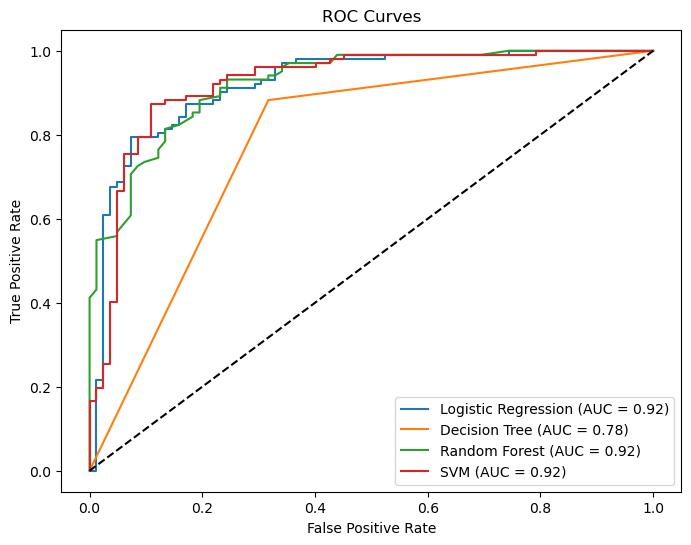

In [68]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()

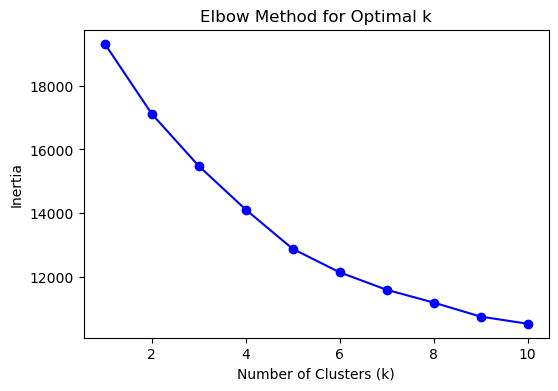

In [69]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, "bo-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)


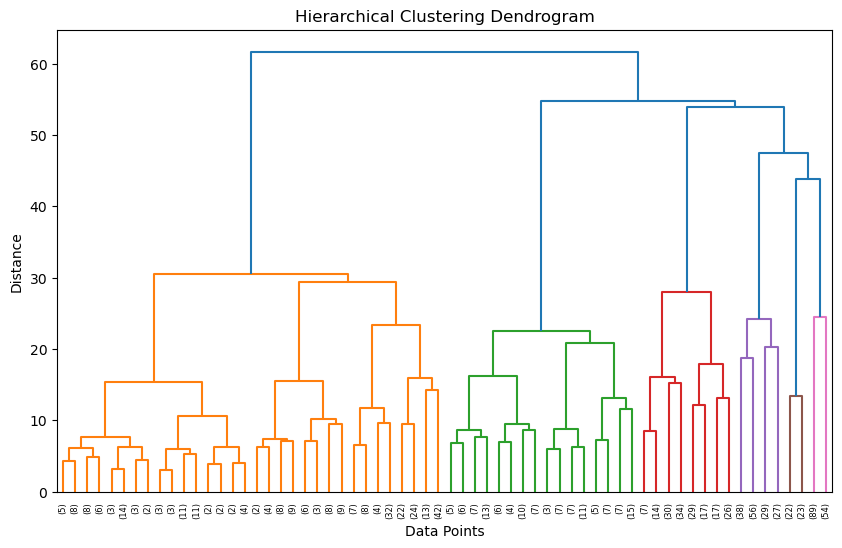

In [70]:
linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
hc_labels = hc.fit_predict(X_scaled)

In [71]:
print("\nCluster vs Actual Comparison:")

# KMeans
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
nmi_kmeans = normalized_mutual_info_score(y, kmeans_labels)

print(f"K-Means → Adjusted Rand Index: {ari_kmeans:.3f}, Normalized Mutual Info: {nmi_kmeans:.3f}")

# Hierarchical
ari_hc = adjusted_rand_score(y, hc_labels)
nmi_hc = normalized_mutual_info_score(y, hc_labels)

print(f"Hierarchical → Adjusted Rand Index: {ari_hc:.3f}, Normalized Mutual Info: {nmi_hc:.3f}")


Cluster vs Actual Comparison:
K-Means → Adjusted Rand Index: 0.309, Normalized Mutual Info: 0.235
Hierarchical → Adjusted Rand Index: 0.086, Normalized Mutual Info: 0.060


In [72]:
from scipy.stats import randint, uniform

lr_params = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs", "liblinear"]
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_params, cv=5, scoring="f1")
lr_grid.fit(X_train, y_train)

dt_params = {
    "max_depth": randint(2, 10),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10)
}
dt_rand = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_params, n_iter=20, cv=5, scoring="f1", random_state=42)
dt_rand.fit(X_train, y_train)

rf_params = {
    "n_estimators": randint(50, 300),
    "max_depth": randint(2, 10),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10)
}
rf_rand = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=20, cv=5, scoring="f1", random_state=42)
rf_rand.fit(X_train, y_train)


svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring="f1")
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [73]:
optimized_results = {}
for name, model_search in {
    "Logistic Regression": lr_grid,
    "Decision Tree": dt_rand,
    "Random Forest": rf_rand,
    "SVM": svm_grid
}.items():
    model = model_search.best_estimator_
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    optimized_results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba),
        "Best Params": model_search.best_params_
    }

optimized_df = pd.DataFrame(optimized_results).T
print(optimized_df)


                     Accuracy Precision    Recall        F1       AUC  \
Logistic Regression  0.831522  0.831776  0.872549  0.851675  0.913797   
Decision Tree        0.798913  0.798165  0.852941  0.824645  0.866332   
Random Forest        0.853261  0.844037  0.901961  0.872038  0.919417   
SVM                  0.853261  0.826087  0.931373  0.875576  0.921927   

                                                           Best Params  
Logistic Regression    {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}  
Decision Tree        {'max_depth': 4, 'min_samples_leaf': 8, 'min_s...  
Random Forest        {'max_depth': 8, 'min_samples_leaf': 3, 'min_s...  
SVM                     {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}  


In [74]:
comparison_df = pd.concat([results_df, optimized_df], axis=1, keys=["Baseline","Optimized"])
print("\nComparison of Baseline vs Optimized:\n", comparison_df)


Comparison of Baseline vs Optimized:
                      Baseline                                          \
                     Accuracy Precision    Recall  F1-score       AUC   
Logistic Regression  0.836957  0.827273  0.892157  0.858491  0.921330   
Decision Tree        0.793478  0.775862  0.882353  0.825688  0.782640   
Random Forest        0.836957  0.827273  0.892157  0.858491  0.923302   
SVM                  0.853261  0.826087  0.931373  0.875576  0.922406   

                    Optimized                                          \
                     Accuracy Precision    Recall        F1       AUC   
Logistic Regression  0.831522  0.831776  0.872549  0.851675  0.913797   
Decision Tree        0.798913  0.798165  0.852941  0.824645  0.866332   
Random Forest        0.853261  0.844037  0.901961  0.872038  0.919417   
SVM                  0.853261  0.826087  0.931373  0.875576  0.921927   

                                                                        
          

In [75]:
best_svm = optimized_models["SVM"]

print("\nBest Model Selected: SVM")
print(best_svm)

# --- Predict on test set ---
y_pred_svm = best_svm.predict(X_test)

# --- Evaluation ---
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))


Best Model Selected: SVM
SVC(C=1, kernel='linear', probability=True, random_state=42)

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.90      0.76      0.82        82
           1       0.83      0.93      0.88       102

    accuracy                           0.85       184
   macro avg       0.86      0.84      0.85       184
weighted avg       0.86      0.85      0.85       184



In [84]:
# Build sample row
sample_dict = {
    'age': 63,
    'trestbps': 145,
    'chol': 273,
    'thalach': 130,
    'oldpeak': 2.3,
    'ca': 0,
    'sex_1.0': 1,
    'cp_2.0': 0, 'cp_3.0': 0, 'cp_4.0': 0,
    'fbs_1.0': 1,
    'restecg_1.0': 0, 'restecg_2.0': 0,
    'exang_1.0': 0,
    'slope_2.0': 1, 'slope_3.0': 0,
    'thal_3.0': 0, 'thal_6.0': 0, 'thal_7.0': 1
}

# Ensure DataFrame matches training columns, fill missing with 0
sample_input = pd.DataFrame([sample_dict], columns=columns_).fillna(0)

# Prediction
y_pred = optimized_models["SVM"].predict(sample_input)[0]
y_prob = optimized_models["SVM"].predict_proba(sample_input)[0][1]

print("SVM Prediction:")
print(f"  Predicted: {y_pred}, True: {true_label}")
print(f"  Probability of Heart Disease: {y_prob:.4f}")




SVM Prediction:
  Predicted: 1, True: 1
  Probability of Heart Disease: 1.0000


In [86]:
with open('classifier.pkl', 'wb') as file:
    pickle.dump(optimized_models["SVM"], file)

In [87]:
import os
print(os.getcwd())


c:\python assignments
